# Agent based model of infection spread
### Author: Kirill Zakharov

In [244]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import display
from enum import Enum
%matplotlib inline

In [411]:
np.random.seed(10)

class Status(Enum):
    """
    Agent status
    """
    Suspicious = 's'
    Infected = 'i'
    Healthy = 'h'

class Agent:

    def __init__(self, **kwargs):
        self.status = kwargs.get("status", Status.Suspicious) #one from three possible status
        self.x = kwargs.get("x", 0.1) #postition X
        self.y = kwargs.get("y", 0.1) #position Y
        self.k = kwargs.get("k", 5) #the number of contacts
        self.age = kwargs.get("age", 30) #age of the agent
        self.location = (self.x, self.y)
        self.isolated = []
        self.inf_prec = 50

    def change_location(self):
        self.x, self.y = round(uniform(0, 1),4), round(uniform(0, 1),4)
        self.location = (self.x, self.y)

    def distance(self, other):
        return sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    

    def near_people(self, agents):
        distances = []
        for agent in agents[:self.k]:
            if self != agent:
                dist = self.distance(agent)
                distances.append((dist, agent))
        distances.sort(key=lambda x: x[0])
        nears = [(d, agent) for d, agent in distances]

        return nears

    def inf_check(self, delta, agents):
        nears = self.near_people(agents)
        for near in nears:
            if near[0] <= delta:
                self.status = Status.Infected
        return
    
    def test_infection(self):
        test_infection = random.randint(0, 100)
        if test_infection >= self.inf_prec:
            return True
        else:
            return False
    
    def move(self, delta, population):
        n = len(population)
        if self.status.value == 'h':
            self.change_location()
            self.inf_check(delta, population)
        if self.status.value == 's' and self not in self.isolated:
            if self.test_infection():
                self.status = Status.Infected
            else:
                self.isolated.append(self)


def create_agent(population, status):
        """
        Create a new agent
        """
        x, y = round(uniform(0, 1),4), round(uniform(0, 1),4) #position
        age = random.randint(0, 80) #age
        k = random.randint(0, 40) #the number of contacts
        
        population.append(Agent(x=x, y=y, age=age, k=k, status=status))
        return
        
def initialize(population, num_p):
        # Initial infected population
        for _ in range(num_p//3):
            create_agent(population, Status.Infected)

        # Initial healthy population
        for _ in range(num_p - 2*len(population)):
            create_agent(population, Status.Healthy)

        # Initial suspicious population
        for _ in range(num_p - len(population)):
            create_agent(population, Status.Suspicious)
        
        return
        

    

In [412]:
num_p = 1000
population = []
delta = 0.1 #velocity of infection spread
initialize(population, num_p)
population[5].inf_check(delta, population)
len(population)

1000

In [413]:
population[800].move(delta, population)
population[800].status
population[800].isolated

[]

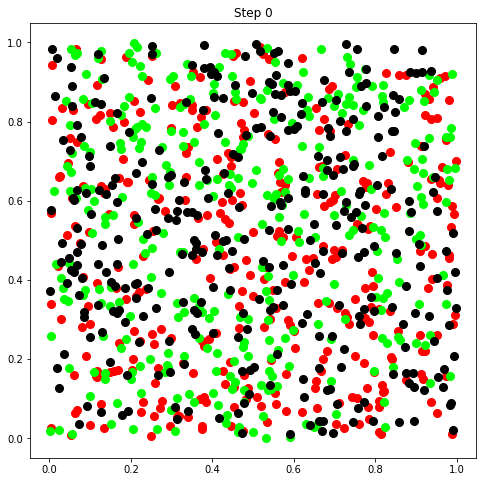

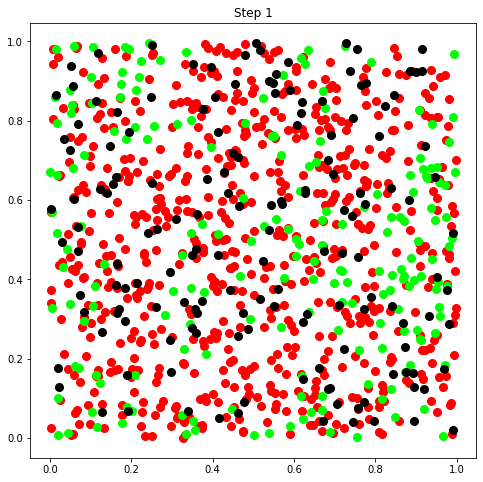

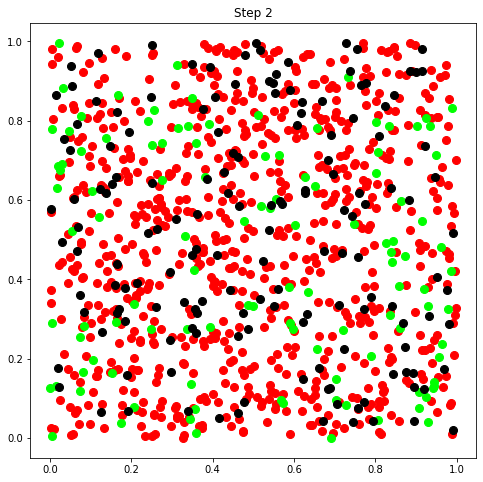

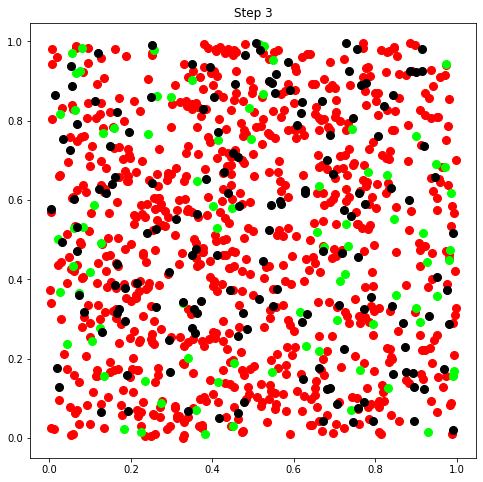

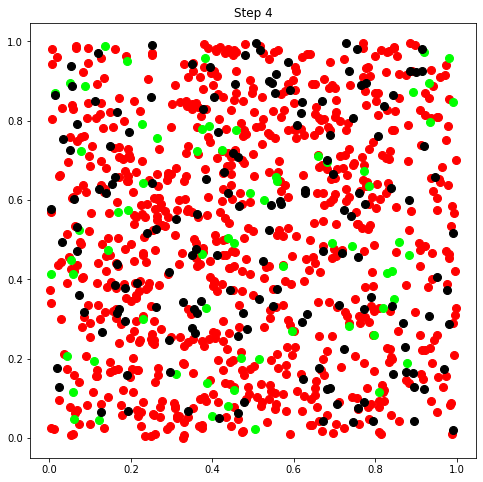

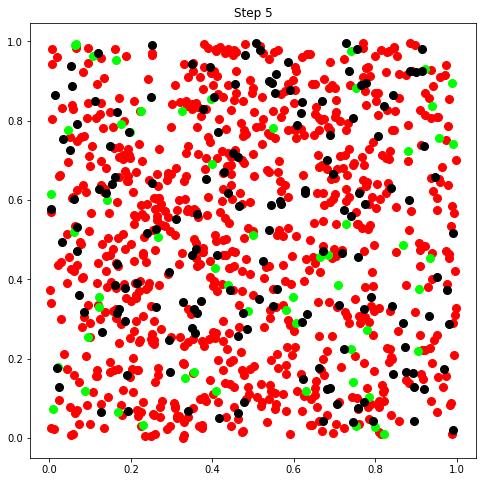

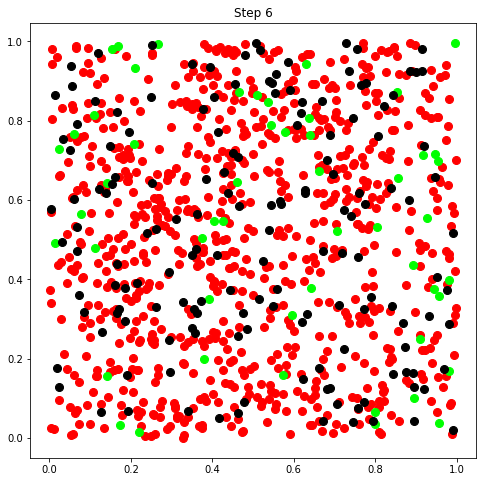

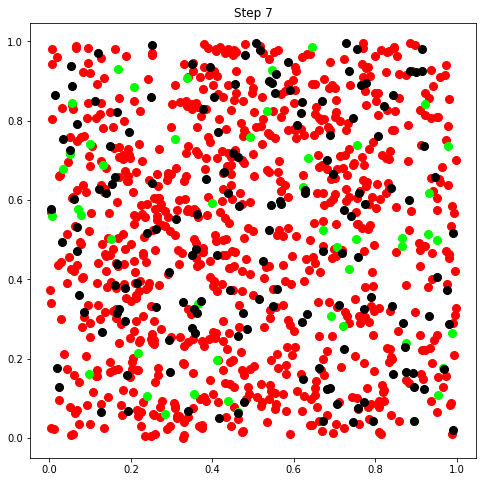

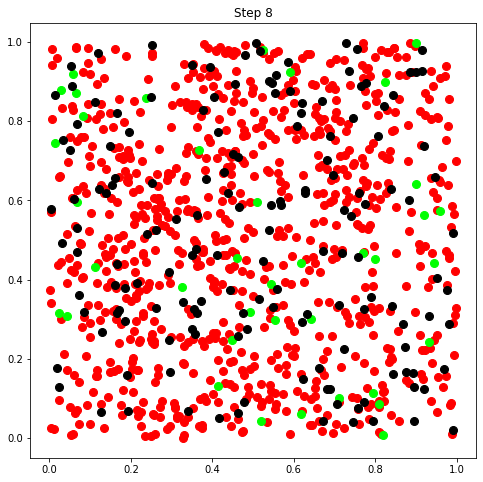

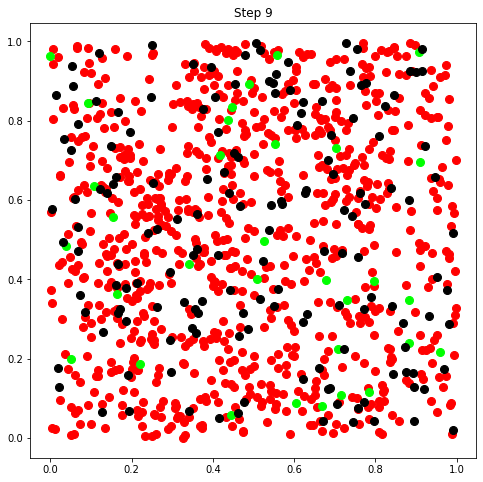

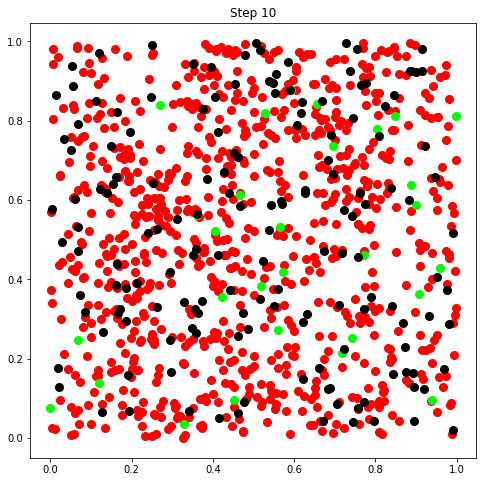

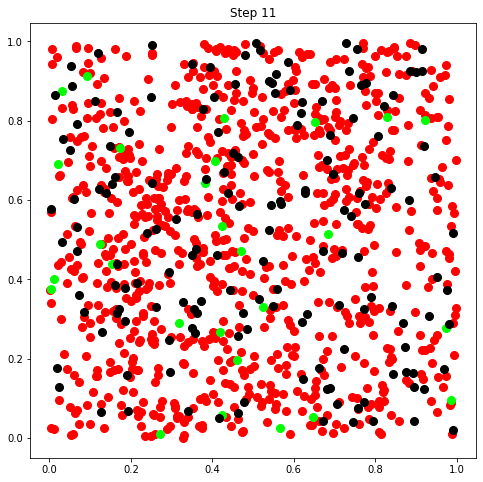

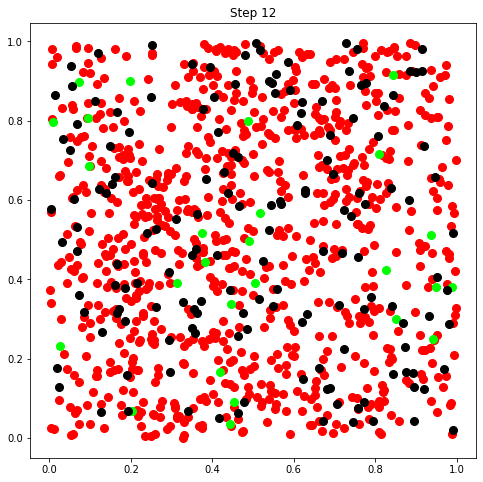

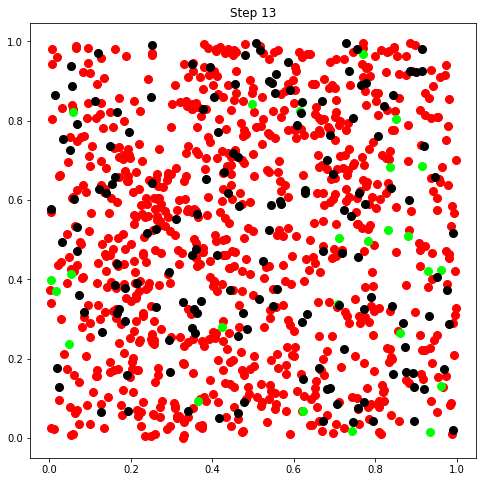

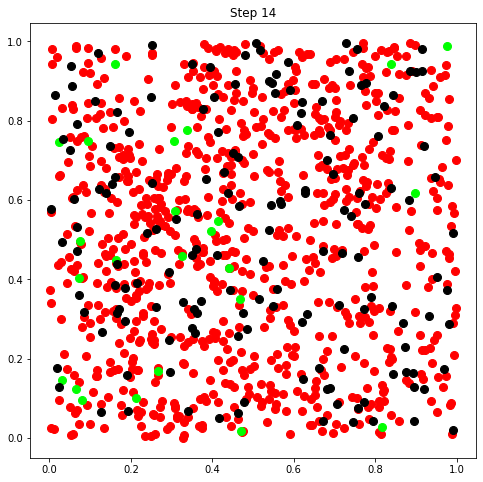

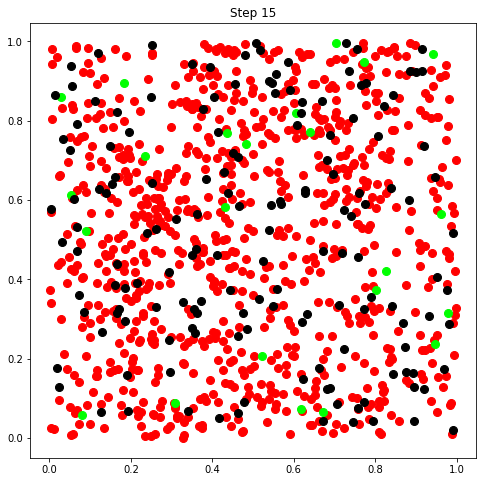

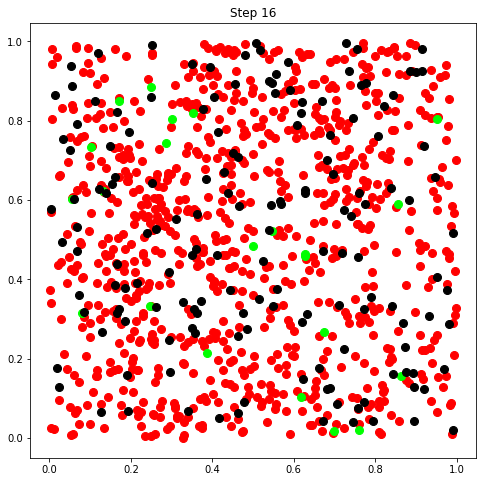

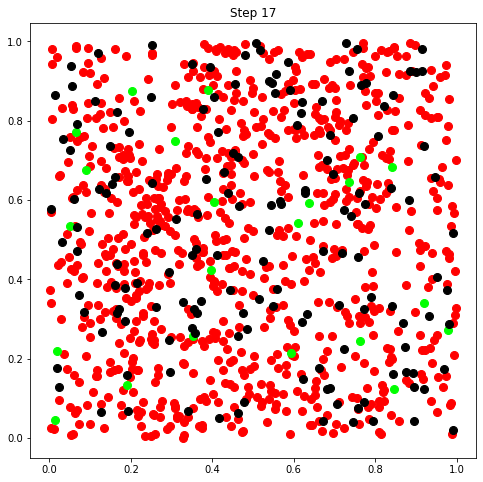

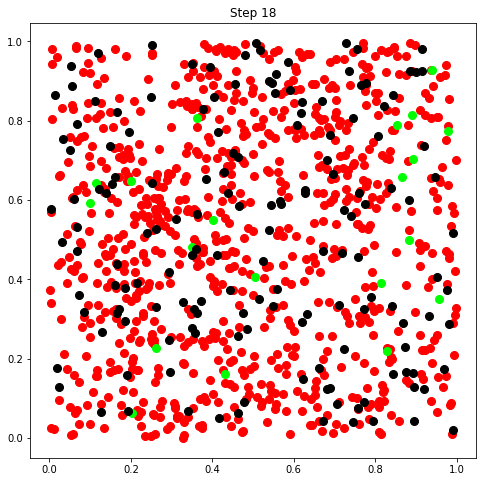

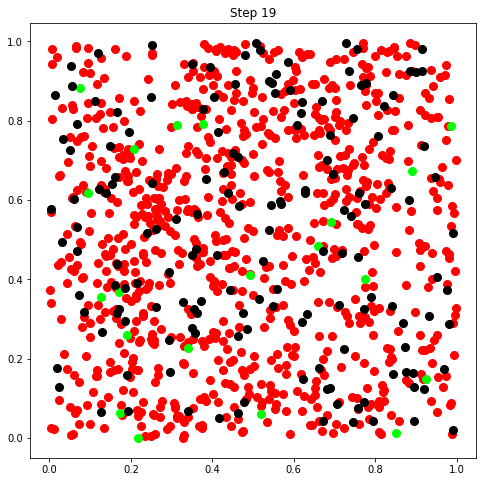

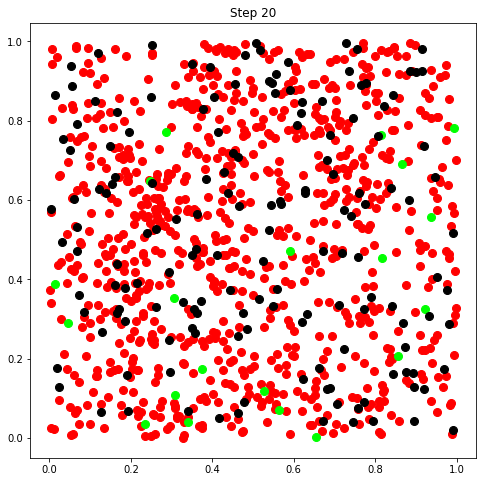

In [414]:
def plot_distribution(population, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    for agent in population:
        x, y = agent.location
        if agent.status.value == 'i':
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.status.value == 'h':
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', c='red', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', c='lime', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', c='black', **plot_args)
    ax.set_title(f'Step {cycle_num-1}')
    plt.show()

count = 1

for agent in population:
    if agent.status.value == 'h':
        healthy.append(agent)
while True:
    healthy = []
    for agent in population:
        if agent.status.value == 'h':
            healthy.append(agent)
    if len(healthy) >= num_p*2/100:
        plot_distribution(population, count)
        count += 1
        for agent in population:
            agent.move(delta, population)
    else:
        break
            